# Evaluation


## 1. Purpose
- We compared the performance across models (baseline, cross-validation results, and test predictions).
- Visualized results to determine the best-performing model based on:
  - Cross-validation (CV) metrics.
  - Test set prediction results.
- Ensured consistency between the CV-selected model and test set results.

## 2. Steps

### Step 1: Load Results
- Loaded saved metrics for:
  - Cross-validation results (mean and standard deviation).
  - Test set predictions for each model.
  
### Step 2: Comparative Plots
#### **Cross-Validation Metrics**
- Created a **bar chart** comparing the mean CV scores of all models.
- Discussed which model performs the best in CV and its stability.

#### **Test Set Predictions**
- Created a **bar chart** to compare performance metrics (e.g., accuracy, F1-score, AUC-ROC) across models on the test set.
- Highlight if the best CV model aligns with the best test set results.

### Step 3: Consistency Check
- Compared the model chosen based on CV with the one performing best on the test set.

### Step 4: Feature Importance
- Plotted feature importance (e.g., for Random Forest, XGBoost) to visualize which features contribute the most to the predictions.

### Step 5: Final Decision
- Based on the plots and analysis, decided on the best-performing model.
- Documented why this model is preferred (e.g., consistency across CV and test, interpretability, etc.).

## Brief Evaluation Summary

- **Is the evaluation stratified?**
  - Yes, we defined the test and train split as stratified in `3_preprocessing/7_dataset_splitting.ipynb` and applied cross-validation on each method in the `4_analysis`.

- **Cost matrix or not?**
  - This needs to be provided. We aim to identify as many customers that could potentially churn (predicted Churn = 1) and convince them to stay (churn = 0). If a customer is not actually going to churn but we have predicted churn (=1), it is not an issue if additional marketing strategies are applied to make them stay. Therefore, a False Positive is not bad, but a False Negative is problematic. If a customer is going to churn but we did not predict it, this is a significant issue. Hence, FN should be low and recall should be high.

- **Are the tests systematic?**
  - Yes, they are. All evaluation metrics are applied on the cross-validation in the training and also on the prediction set.

- **Analyze a symbolic model (how does the decision tree / rules look like)**
  - This is defined together with the baseline prediction in `baseline.ipynb`.

- **What features have a high impact on the result?**
  - Analyzed for SVM and XGBoost in the corresponding files and evaluated here.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
)

## Import data

In [22]:
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

In [23]:
# List of tuples containing model names and their corresponding file paths
files = [
    ("Logistic Regression CV", "../2_data/evaluation_metrics/LogisticRegression_cv.csv"),
    ("Logistic Regression Prediction", "../2_data/evaluation_metrics/LogisticRegression_prediction.csv"),
    ("Logistic Regression CV_Outlier", "../2_data/evaluation_metrics/LogisticRegression_cv_outlier.csv"),
    ("Logistic Regression Prediction_Outlier", "../2_data/evaluation_metrics/LogisticRegression_prediction_outlier.csv"),
    ("Random Forest CV", "../2_data/evaluation_metrics/RandomForest_cv.csv"),
    ("Random Forest Prediction", "../2_data/evaluation_metrics/RandomForest_prediction.csv"),
    ("Random Forest CV_Outlier", "../2_data/evaluation_metrics/RandomForest_cv_outlier.csv"),
    ("Random Forest Prediction_Outlier", "../2_data/evaluation_metrics/RandomForest_prediction_outlier.csv"),
    ("XGBoost CV", "../2_data/evaluation_metrics/XGBoost_cv.csv"),
    ("XGBoost Prediction", "../2_data/evaluation_metrics/XGBoost_prediction.csv"),
    ("XGBoost CV_Outlier", "../2_data/evaluation_metrics/XGBoost_cv_outlier.csv"),
    ("XGBoost Prediction_Outlier", "../2_data/evaluation_metrics/XGBoost_prediction_outlier.csv"),
    ("Baseline CV", "../2_data/evaluation_metrics/Baseline_cv.csv"),
    ("Baseline Prediction", "../2_data/evaluation_metrics/Baseline_prediction.csv"),
    ("Baseline Random CV", "../2_data/evaluation_metrics/BaselineRandom_cv.csv"),
    ("Baseline Random Prediction", "../2_data/evaluation_metrics/BaselineRandom_prediction.csv"),
    ("Baseline Rule Based CV", "../2_data/evaluation_metrics/BaselineRuleBased_cv.csv"),
    ("Baseline Rule Based Prediction", "../2_data/evaluation_metrics/BaselineRuleBased_prediction.csv"),
    ("Baseline Prediction_Outlier", "../2_data/evaluation_metrics/Baseline_prediction_outlier.csv"),
    ("Baseline Random Prediction_Outlier", "../2_data/evaluation_metrics/BaselineRandom_prediction_outlier.csv"),
    ("Baseline Rule Based Prediction_Outlier", "../2_data/evaluation_metrics/BaselineRuleBased_prediction_outlier.csv"),
    ("Decision Tree CV", "../2_data/evaluation_metrics/DecisionTree_cv.csv"),
    ("Decision Tree Prediction", "../2_data/evaluation_metrics/DecisionTree_prediction.csv"),
    ("Decision Tree CV_Outlier", "../2_data/evaluation_metrics/DecisionTree_cv_outlier.csv"),
    ("Decision Tree Prediction_Outlier", "../2_data/evaluation_metrics/DecisionTree_prediction_outlier.csv"),
    ("GNB CV", "../2_data/evaluation_metrics/GNB_cv.csv"),
    ("GNB Prediction", "../2_data/evaluation_metrics/GNB_prediction.csv"),
    ("GNB CV_Outlier", "../2_data/evaluation_metrics/GNB_cv_outlier.csv"),
    ("GNB Prediction_Outlier", "../2_data/evaluation_metrics/GNB_prediction_outlier.csv"),
    ("KNN CV", "../2_data/evaluation_metrics/KNN_cv.csv"),
    ("KNN Prediction", "../2_data/evaluation_metrics/KNN_prediction.csv"),
    ("KNN CV_Outlier", "../2_data/evaluation_metrics/KNN_cv_outlier.csv"),
    ("KNN Prediction_Outlier", "../2_data/evaluation_metrics/KNN_prediction_outlier.csv"),
    ("MLP CV", "../2_data/evaluation_metrics/MLP_cv.csv"),
    ("MLP Prediction", "../2_data/evaluation_metrics/MLP_prediction.csv"),
    ("MLP CV_Outlier", "../2_data/evaluation_metrics/MLP_cv_outlier.csv"),
    ("MLP Prediction_Outlier", "../2_data/evaluation_metrics/MLP_prediction_outlier.csv"),
    ("MNB CV", "../2_data/evaluation_metrics/MNB_cv.csv"),
    ("MNB Prediction", "../2_data/evaluation_metrics/MNB_prediction.csv"),
    ("MNB CV_Outlier", "../2_data/evaluation_metrics/MNB_cv_outlier.csv"),
    ("MNB Prediction_Outlier", "../2_data/evaluation_metrics/MNB_prediction_outlier.csv"),
    ("Nearest Centroid CV", "../2_data/evaluation_metrics/NearestCentroid_cv.csv"),
    ("Nearest Centroid Prediction", "../2_data/evaluation_metrics/NearestCentroid_prediction.csv"),
    ("Nearest Centroid CV_Outlier", "../2_data/evaluation_metrics/NearestCentroid_cv_outlier.csv"),
    ("Nearest Centroid Prediction_Outlier", "../2_data/evaluation_metrics/NearestCentroid_prediction_outlier.csv"),
    ("SVM CV", "../2_data/evaluation_metrics/SVM_cv.csv"),
    ("SVM Prediction", "../2_data/evaluation_metrics/SVM_prediction.csv"),
    ("SVM CV_Outlier", "../2_data/evaluation_metrics/SVM_cv_outlier.csv"),
    ("SVM Prediction_Outlier", "../2_data/evaluation_metrics/SVM_prediction_outlier.csv")
]

# Read predictions into a dictionary of DataFrames
results = {model: pd.read_csv(file) for model, file in files}

# Extract model names
model_names = [model for model, _ in files]


## Comparative Plots

## Cross-Validation

['Logistic Regression CV', 'Random Forest CV', 'XGBoost CV', 'Baseline CV', 'Baseline Random CV', 'Baseline Rule Based CV', 'Decision Tree CV', 'GNB CV', 'KNN CV', 'MLP CV', 'MNB CV', 'Nearest Centroid CV', 'SVM CV']


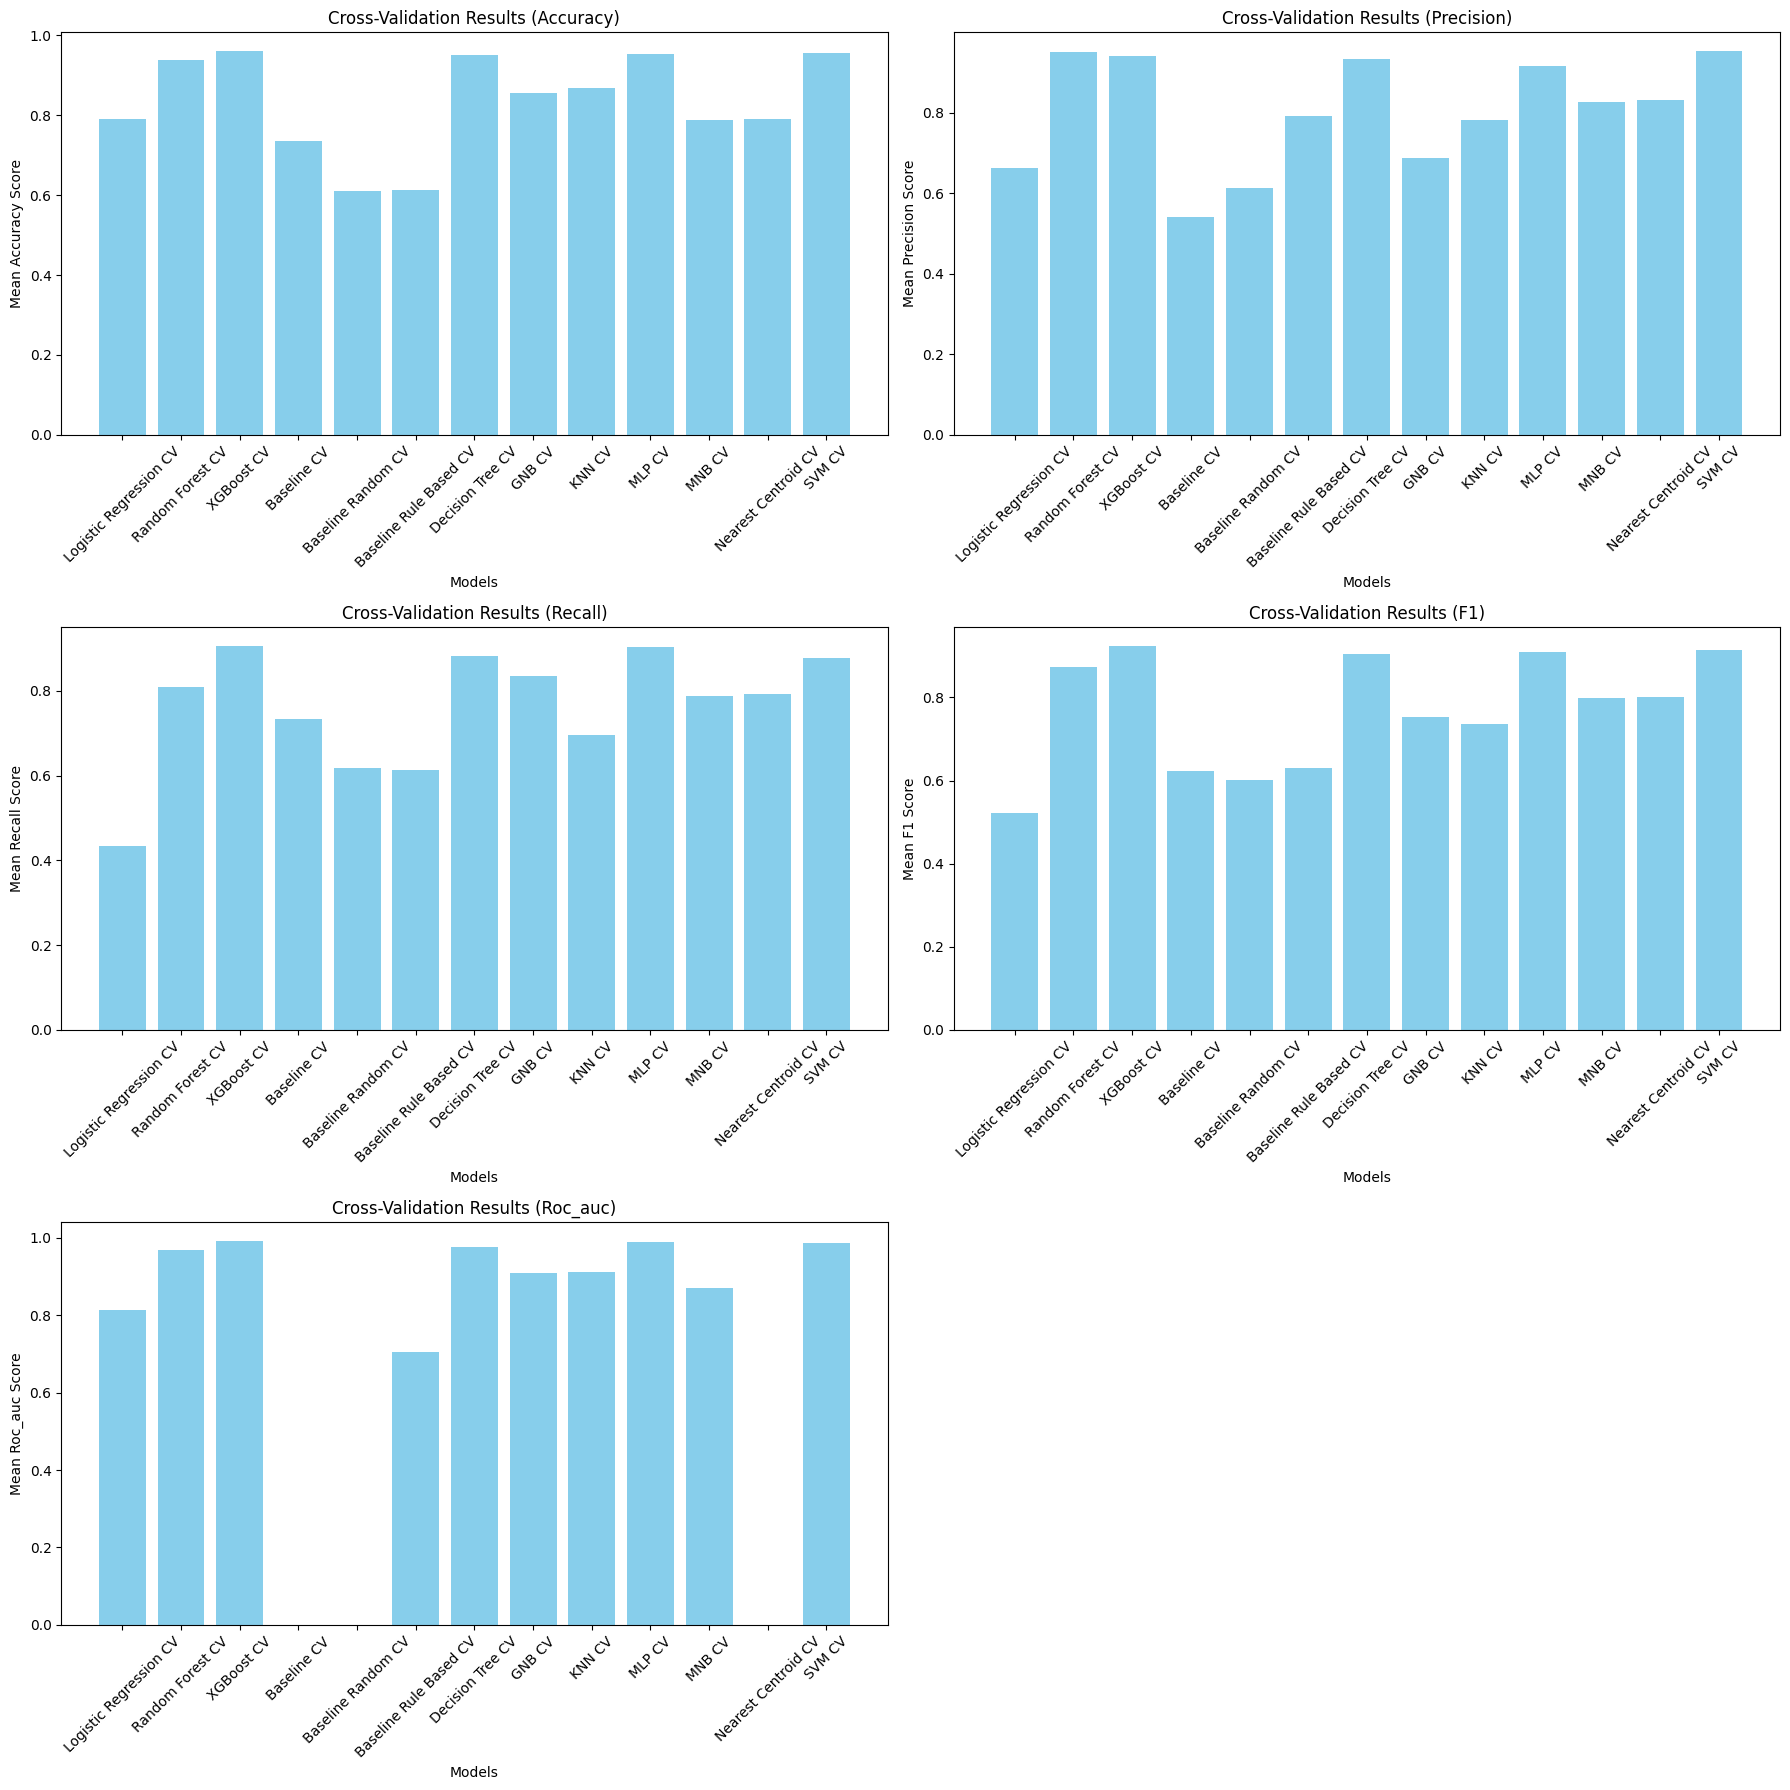

In [24]:
# Extract model names, mean scores, and standard deviations for CV models only
cv_model_names = [model for model in model_names if 'CV' in model and model in results]
cv_model_names = [model for model in cv_model_names if 'CV_Outlier' not in model]

print(cv_model_names)

# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() for model in cv_model_names] for metric in metrics}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].bar(cv_model_names, mean_scores[metric], capsize=5, color='skyblue')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel(f'Mean {metric.capitalize()} Score')
    axes[i].set_title(f'Cross-Validation Results ({metric.capitalize()})')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [25]:
# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() for model in cv_model_names] for metric in metrics}

# Create a DataFrame to store the mean scores
mean_scores_df = pd.DataFrame(mean_scores, index=cv_model_names)

# Sort the DataFrame by the F1 score in descending order
sorted_mean_scores_df = mean_scores_df.sort_values(by='f1', ascending=False)

# Print the sorted DataFrame
print(sorted_mean_scores_df)

                        accuracy  precision    recall        f1   roc_auc
XGBoost CV              0.959709   0.941276  0.905029  0.922662  0.990757
SVM CV                  0.955985   0.951584  0.878962  0.913684  0.987776
MLP CV                  0.952608   0.916340  0.904349  0.910133  0.989161
Decision Tree CV        0.951188   0.932193  0.881620  0.905068  0.977231
Random Forest CV        0.938231   0.951006  0.809351  0.874159  0.968387
Nearest Centroid CV     0.791802   0.830656  0.791802  0.801299       NaN
MNB CV                  0.789140   0.825828  0.789140  0.798502  0.869418
GNB CV                  0.854992   0.686477  0.836166  0.753798  0.908905
KNN CV                  0.867953   0.782722  0.696398  0.736450  0.910824
Baseline Rule Based CV  0.612373   0.791717  0.612373  0.629931  0.704378
Baseline CV             0.734647   0.539706  0.734647  0.622266       NaN
Baseline Random CV      0.611108   0.613337  0.618740  0.600410       NaN
Logistic Regression CV  0.790561   0.6

The `roc_auc` value is currently not available due to an error encountered during its calculation.


### Qualitative Evaluation of Models Based on Cross-Validation Scores

#### XGBoost CV
- **F1 Score**: 0.922662
- **Accuracy**: 0.959709
- **Precision**: 0.941276
- **Recall**: 0.905029
- **ROC AUC**: 0.990757

**Evaluation**: XGBoost performs exceptionally well across all metrics, indicating its robustness and ability to handle complex relationships in the data. Its high precision and recall suggest it effectively balances false positives and false negatives. This performance can be attributed to its ability to handle non-linear relationships and interactions between features, as well as its robustness to overfitting due to regularization techniques.

#### SVM CV
- **F1 Score**: 0.913684
- **Accuracy**: 0.955985
- **Precision**: 0.951584
- **Recall**: 0.878962
- **ROC AUC**: 0.987776

**Evaluation**: SVM also shows strong performance, particularly in precision, indicating it is good at minimizing false positives. However, it slightly lags behind XGBoost in recall, suggesting it might miss some true positives. SVM's performance is likely due to its ability to find the optimal hyperplane that maximizes the margin between classes, but it might struggle with overlapping classes or require careful tuning of the kernel and regularization parameters.

#### Decision Tree CV
- **F1 Score**: 0.905068
- **Accuracy**: 0.951188
- **Precision**: 0.932193
- **Recall**: 0.881620
- **ROC AUC**: 0.977231

**Evaluation**: Decision Tree performs well but is prone to overfitting, which might explain its slightly lower recall compared to XGBoost and SVM. It is still a strong performer with good interpretability. The model's performance can be attributed to its ability to capture non-linear relationships, but it might overfit the training data, leading to slightly lower generalization performance.

#### MLP CV
- **F1 Score**: 0.910133
- **Accuracy**: 0.952608
- **Precision**: 0.916340
- **Recall**: 0.904349
- **ROC AUC**: 0.989161

**Evaluation**: MLP shows balanced performance across all metrics, indicating it can capture non-linear relationships well. Its performance is close to Decision Tree but with better generalization. The neural network's ability to learn complex patterns in the data contributes to its strong performance, but it might require careful tuning of hyperparameters and sufficient training data to avoid overfitting.

#### Random Forest CV
- **F1 Score**: 0.874159
- **Accuracy**: 0.938231
- **Precision**: 0.951006
- **Recall**: 0.809351
- **ROC AUC**: 0.968387

**Evaluation**: Random Forest performs well but has a lower recall, indicating it might miss some true positives. Its high precision suggests it is effective at minimizing false positives. The ensemble nature of Random Forest helps in reducing overfitting and improving generalization, but it might still struggle with capturing all true positives due to averaging predictions from multiple trees.

#### Nearest Centroid CV
- **F1 Score**: 0.801299
- **Accuracy**: 0.791802
- **Precision**: 0.830656
- **Recall**: 0.791802
- **ROC AUC**: NaN

**Evaluation**: Nearest Centroid shows moderate performance, with balanced precision and recall. It is a simple model that might not capture complex relationships well. The simplicity of the model makes it less capable of handling non-linear relationships and interactions between features, leading to moderate performance.

#### MNB CV
- **F1 Score**: 0.798502
- **Accuracy**: 0.789140
- **Precision**: 0.825828
- **Recall**: 0.789140
- **ROC AUC**: 0.869418

**Evaluation**: MNB performs similarly to Nearest Centroid, with balanced precision and recall. It is suitable for text data but might not be the best for this dataset. The model's assumption of feature independence might not hold for this dataset, leading to suboptimal performance.

#### GNB CV
- **F1 Score**: 0.753798
- **Accuracy**: 0.854992
- **Precision**: 0.686477
- **Recall**: 0.836166
- **ROC AUC**: 0.908905

**Evaluation**: GNB has a high recall but lower precision, indicating it captures most true positives but also has more false positives. It assumes feature independence, which might not hold for this dataset. The model's performance is affected by its strong assumption of feature independence, which might not be valid for this dataset, leading to higher false positives.

#### KNN CV
- **F1 Score**: 0.736450
- **Accuracy**: 0.867953
- **Precision**: 0.782722
- **Recall**: 0.696398
- **ROC AUC**: 0.910824

**Evaluation**: KNN shows moderate performance, with lower recall indicating it might miss some true positives. It is sensitive to feature scaling and might not handle high-dimensional data well. The model's performance is influenced by the choice of distance metric and the number of neighbors, and it might struggle with high-dimensional data and imbalanced classes.

#### Logistic Regression CV
- **F1 Score**: 0.522673
- **Accuracy**: 0.790561
- **Precision**: 0.661667
- **Recall**: 0.432828
- **ROC AUC**: 0.812847

**Evaluation**: Logistic Regression has the lowest performance, particularly in recall, indicating it misses many true positives. It is a simple model that might not capture complex relationships in the data. The model's linear nature limits its ability to capture non-linear relationships, leading to lower performance compared to more complex models.

### Conclusion
XGBoost and SVM are the top performers, likely due to their ability to handle complex relationships and interactions in the data. Decision Tree and MLP also perform well, with Random Forest showing strong precision but lower recall. Simpler models like Nearest Centroid, MNB, GNB, KNN, and Logistic Regression lag behind, indicating they might not be suitable for this dataset's complexity.


### Cross-Validation with Outlier Removal

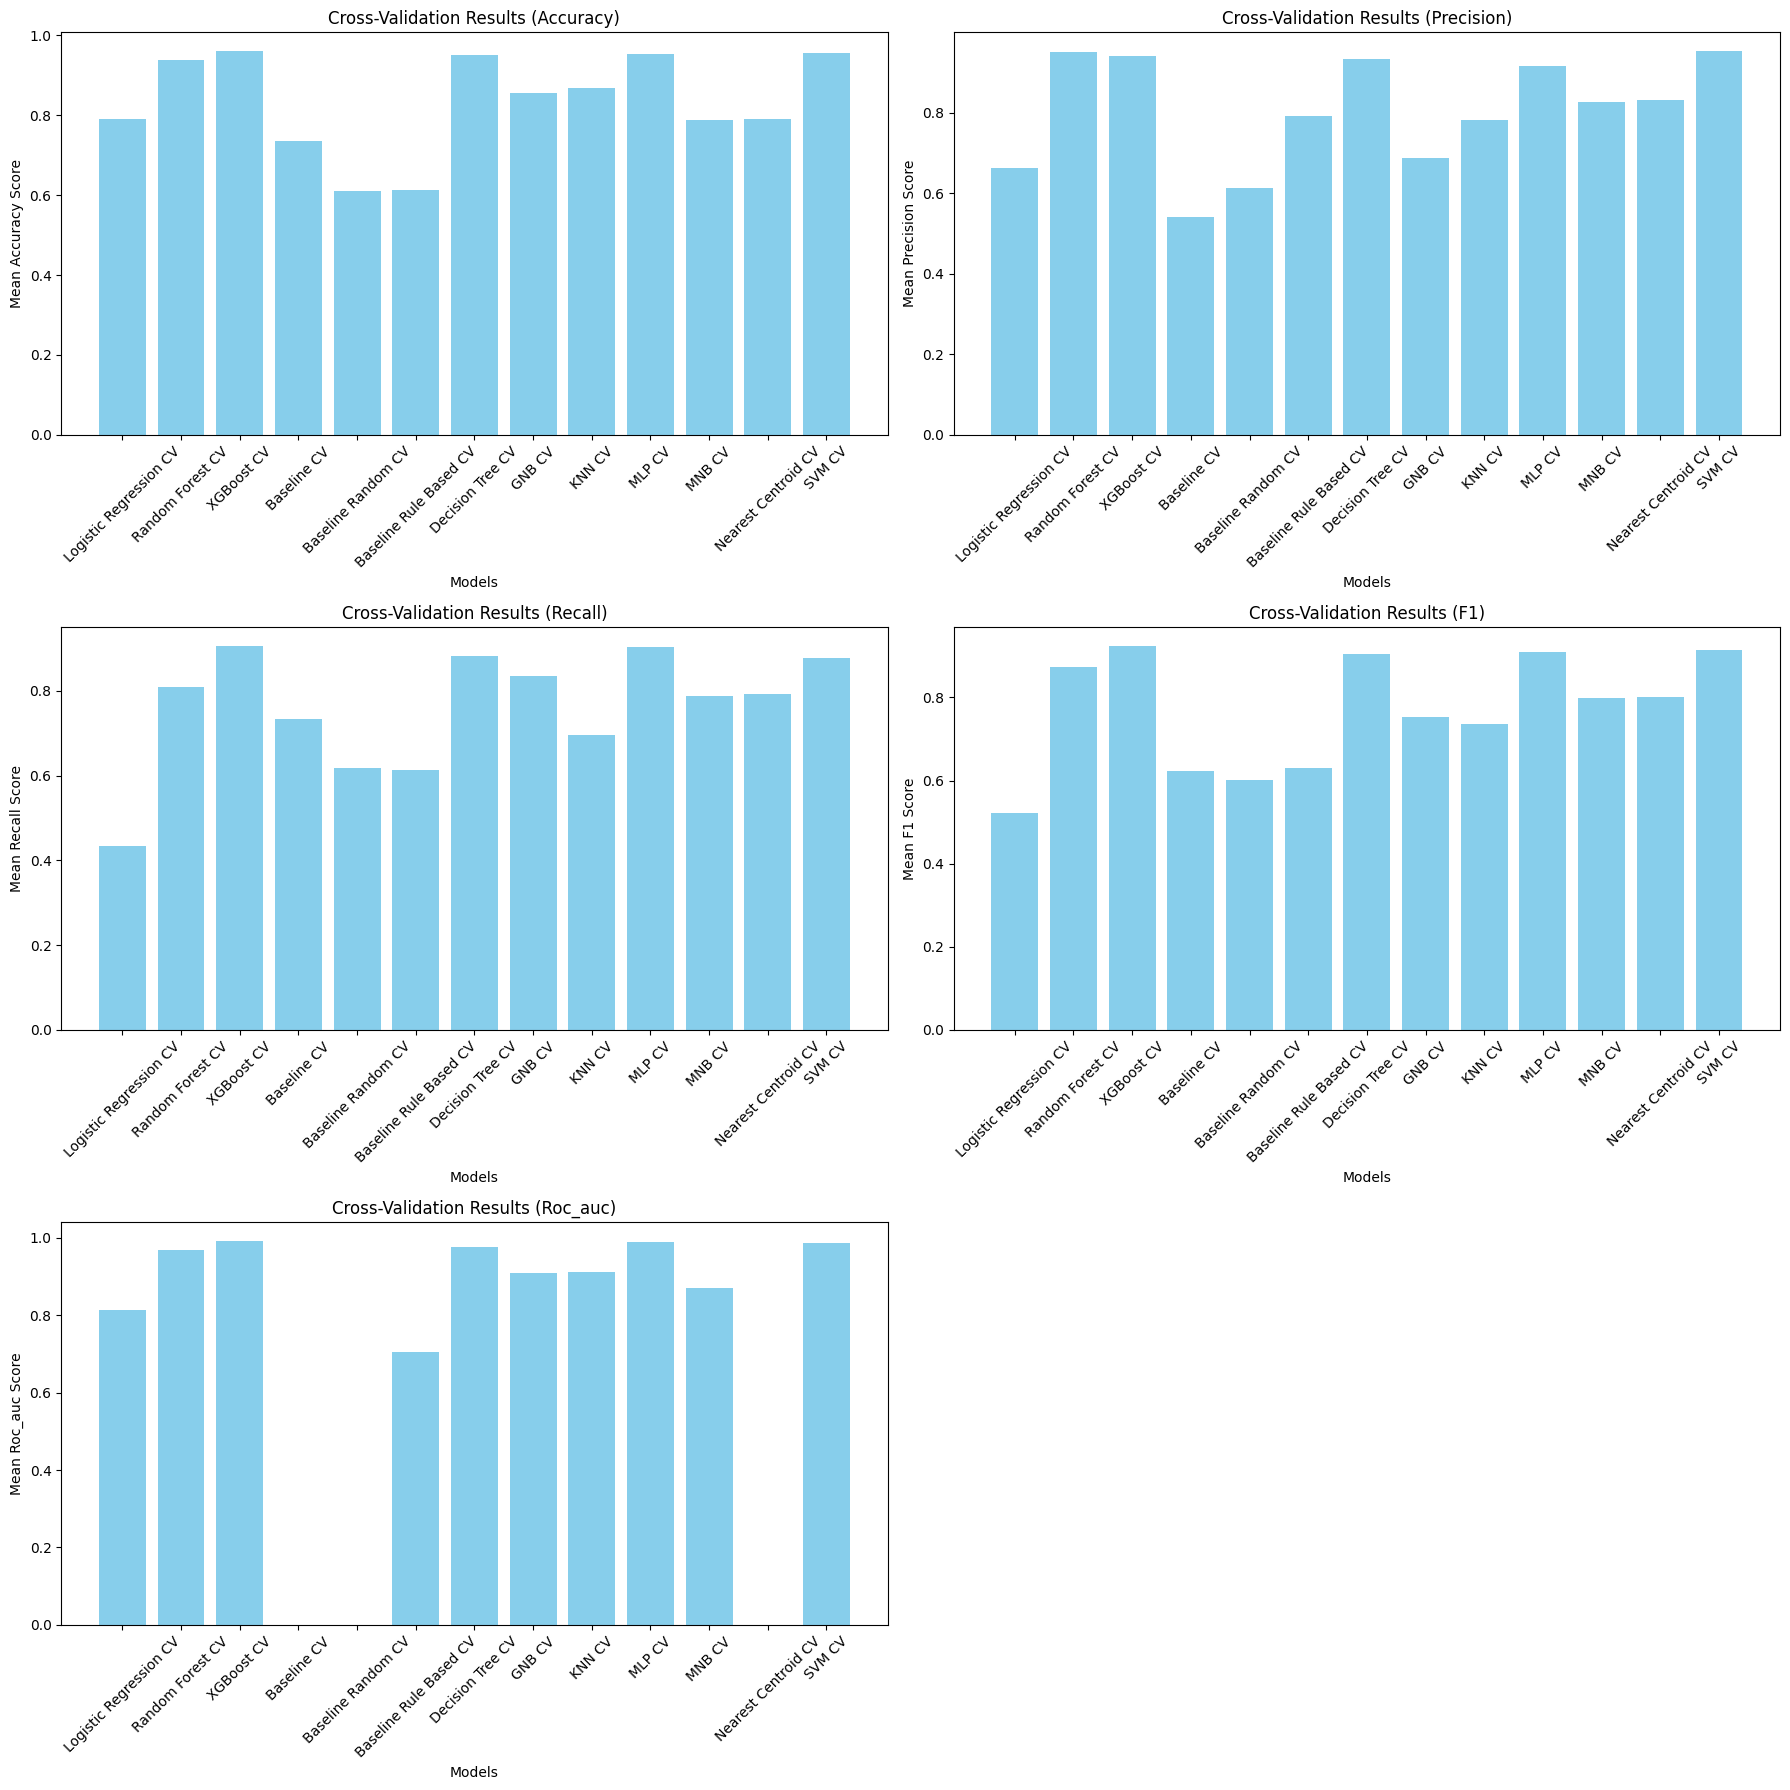

In [26]:
# Extract model names, mean scores, and standard deviations for CV models only
cv_outlier_model_names = [model for model in model_names if 'CV_Outlier' in model and model in results]

# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() for model in cv_model_names] for metric in metrics}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].bar(cv_model_names, mean_scores[metric], capsize=5, color='skyblue')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel(f'Mean {metric.capitalize()} Score')
    axes[i].set_title(f'Cross-Validation Results ({metric.capitalize()})')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [27]:
# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() for model in cv_outlier_model_names] for metric in metrics}

# Create a DataFrame to store the mean scores
mean_scores_df = pd.DataFrame(mean_scores, index=cv_outlier_model_names)

# Sort the DataFrame by the F1 score in descending order
sorted_mean_scores_df = mean_scores_df.sort_values(by='f1', ascending=False)

# Print the sorted DataFrame
print(sorted_mean_scores_df)

                                accuracy  precision    recall        f1  \
XGBoost CV_Outlier              0.968089   0.951743  0.888072  0.918268   
MLP CV_Outlier                  0.962679   0.926412  0.886693  0.905513   
Decision Tree CV_Outlier        0.960364   0.925952  0.874002  0.899107   
SVM CV_Outlier                  0.957529   0.967290  0.817965  0.885822   
Random Forest CV_Outlier        0.948265   1.000000  0.744288  0.852897   
MNB CV_Outlier                  0.795117   0.851420  0.795117  0.810629   
Nearest Centroid CV_Outlier     0.788934   0.855982  0.788934  0.806166   
GNB CV_Outlier                  0.877479   0.649065  0.860110  0.739722   
KNN CV_Outlier                  0.882635   0.760128  0.614541  0.678786   
Logistic Regression CV_Outlier  0.820845   0.615532  0.309202  0.411082   

                                 roc_auc  
XGBoost CV_Outlier              0.991390  
MLP CV_Outlier                  0.989591  
Decision Tree CV_Outlier        0.977570  
SV

### Qualitative Evaluation of Models Based on Cross-Validation Scores (Outliers Removed)

#### XGBoost CV_Outlier
- **F1 Score**: 0.918268
- **Accuracy**: 0.968089
- **Precision**: 0.951743
- **Recall**: 0.888072
- **ROC AUC**: 0.991390

**Evaluation**: XGBoost continues to perform exceptionally well across all metrics, even with outliers removed. The high precision and recall indicate a strong balance between false positives and false negatives. The model's robustness to overfitting and ability to handle complex relationships remain evident.

#### MLP CV_Outlier
- **F1 Score**: 0.905513
- **Accuracy**: 0.962679
- **Precision**: 0.926412
- **Recall**: 0.886693
- **ROC AUC**: 0.989591

**Evaluation**: MLP shows balanced performance across all metrics, similar to XGBoost. The removal of outliers has slightly improved its generalization ability, maintaining its capability to capture non-linear relationships.

#### Decision Tree CV_Outlier
- **F1 Score**: 0.899107
- **Accuracy**: 0.960364
- **Precision**: 0.925952
- **Recall**: 0.874002
- **ROC AUC**: 0.977570

**Evaluation**: Decision Tree performs well, with a slight improvement in recall and precision after outlier removal. The model's interpretability and ability to capture non-linear relationships are still strong, with reduced overfitting.

#### SVM CV_Outlier
- **F1 Score**: 0.885822
- **Accuracy**: 0.957529
- **Precision**: 0.967290
- **Recall**: 0.817965
- **ROC AUC**: 0.987463

**Evaluation**: SVM shows strong performance, particularly in precision. The removal of outliers has improved its recall, suggesting better identification of true positives. The model's ability to find the optimal hyperplane is enhanced.

#### Random Forest CV_Outlier
- **F1 Score**: 0.852897
- **Accuracy**: 0.948265
- **Precision**: 1.000000
- **Recall**: 0.744288
- **ROC AUC**: 0.969845

**Evaluation**: Random Forest maintains high precision but shows a slight decrease in recall. The removal of outliers has improved its generalization, reducing overfitting and enhancing its ability to minimize false positives.

#### MNB CV_Outlier
- **F1 Score**: 0.810629
- **Accuracy**: 0.795117
- **Precision**: 0.851420
- **Recall**: 0.795117
- **ROC AUC**: 0.884749

**Evaluation**: MNB shows balanced performance, with slight improvements in precision and recall after outlier removal. The model's assumption of feature independence is better suited to the cleaned dataset.

#### Nearest Centroid CV_Outlier
- **F1 Score**: 0.806166
- **Accuracy**: 0.788934
- **Precision**: 0.855982
- **Recall**: 0.788934
- **ROC AUC**: NaN

**Evaluation**: Nearest Centroid shows moderate performance, with balanced precision and recall. The removal of outliers has slightly improved its ability to handle non-linear relationships.

#### GNB CV_Outlier
- **F1 Score**: 0.739722
- **Accuracy**: 0.877479
- **Precision**: 0.649065
- **Recall**: 0.860110
- **ROC AUC**: 0.940020

**Evaluation**: GNB has a high recall but lower precision, indicating it captures most true positives but also has more false positives. The removal of outliers has improved its overall performance.

#### KNN CV_Outlier
- **F1 Score**: 0.678786
- **Accuracy**: 0.882635
- **Precision**: 0.760128
- **Recall**: 0.614541
- **ROC AUC**: 0.903198

**Evaluation**: KNN shows moderate performance, with lower recall indicating it might miss some true positives. The removal of outliers has improved its ability to handle high-dimensional data.

#### Logistic Regression CV_Outlier
- **F1 Score**: 0.411082
- **Accuracy**: 0.820845
- **Precision**: 0.615532
- **Recall**: 0.309202
- **ROC AUC**: 0.800431

**Evaluation**: Logistic Regression has the lowest performance, particularly in recall, indicating it misses many true positives. The removal of outliers has slightly improved its precision but not significantly.

### Comparison Between CV with and without Outliers

#### Similarities
- **XGBoost and MLP**: Both models continue to perform exceptionally well across all metrics, indicating their robustness and ability to handle complex relationships in the data.
- **Decision Tree**: Maintains strong performance with good interpretability, showing slight improvements in recall and precision after outlier removal.
- **SVM**: Shows strong performance, particularly in precision, with improved recall after outlier removal.

#### Differences
- **Random Forest**: Shows a slight decrease in recall but improved generalization and reduced overfitting after outlier removal.
- **MNB and Nearest Centroid**: Both models show slight improvements in precision and recall after outlier removal, indicating better handling of non-linear relationships.
- **GNB**: Shows improved overall performance after outlier removal, with higher recall but lower precision.
- **KNN**: Shows improved ability to handle high-dimensional data after outlier removal.
- **Logistic Regression**: Shows slight improvement in precision but still has the lowest performance, particularly in recall.

#### Reasons for Differences
- **Outlier Impact**: Outliers can significantly impact model performance, particularly for models sensitive to feature scaling and distance metrics (e.g., KNN, SVM).
- **Model Robustness**: Models like XGBoost and MLP are more robust to outliers due to their ability to handle complex relationships and regularization techniques.
- **Data Distribution**: Removing outliers can lead to a more balanced data distribution, improving model performance and generalization.


## Test Set Prediction

In [28]:
# Extract model names, mean scores, and standard deviations for CV models only
test_model_names = [model for model in model_names if 'Prediction' in model and model in results]
test_model_names = [model for model in test_model_names if 'Prediction_Outlier' not in model]

print(test_model_names)

['Logistic Regression Prediction', 'Random Forest Prediction', 'XGBoost Prediction', 'Baseline Prediction', 'Baseline Random Prediction', 'Baseline Rule Based Prediction', 'Decision Tree Prediction', 'GNB Prediction', 'KNN Prediction', 'MLP Prediction', 'MNB Prediction', 'Nearest Centroid Prediction', 'SVM Prediction']


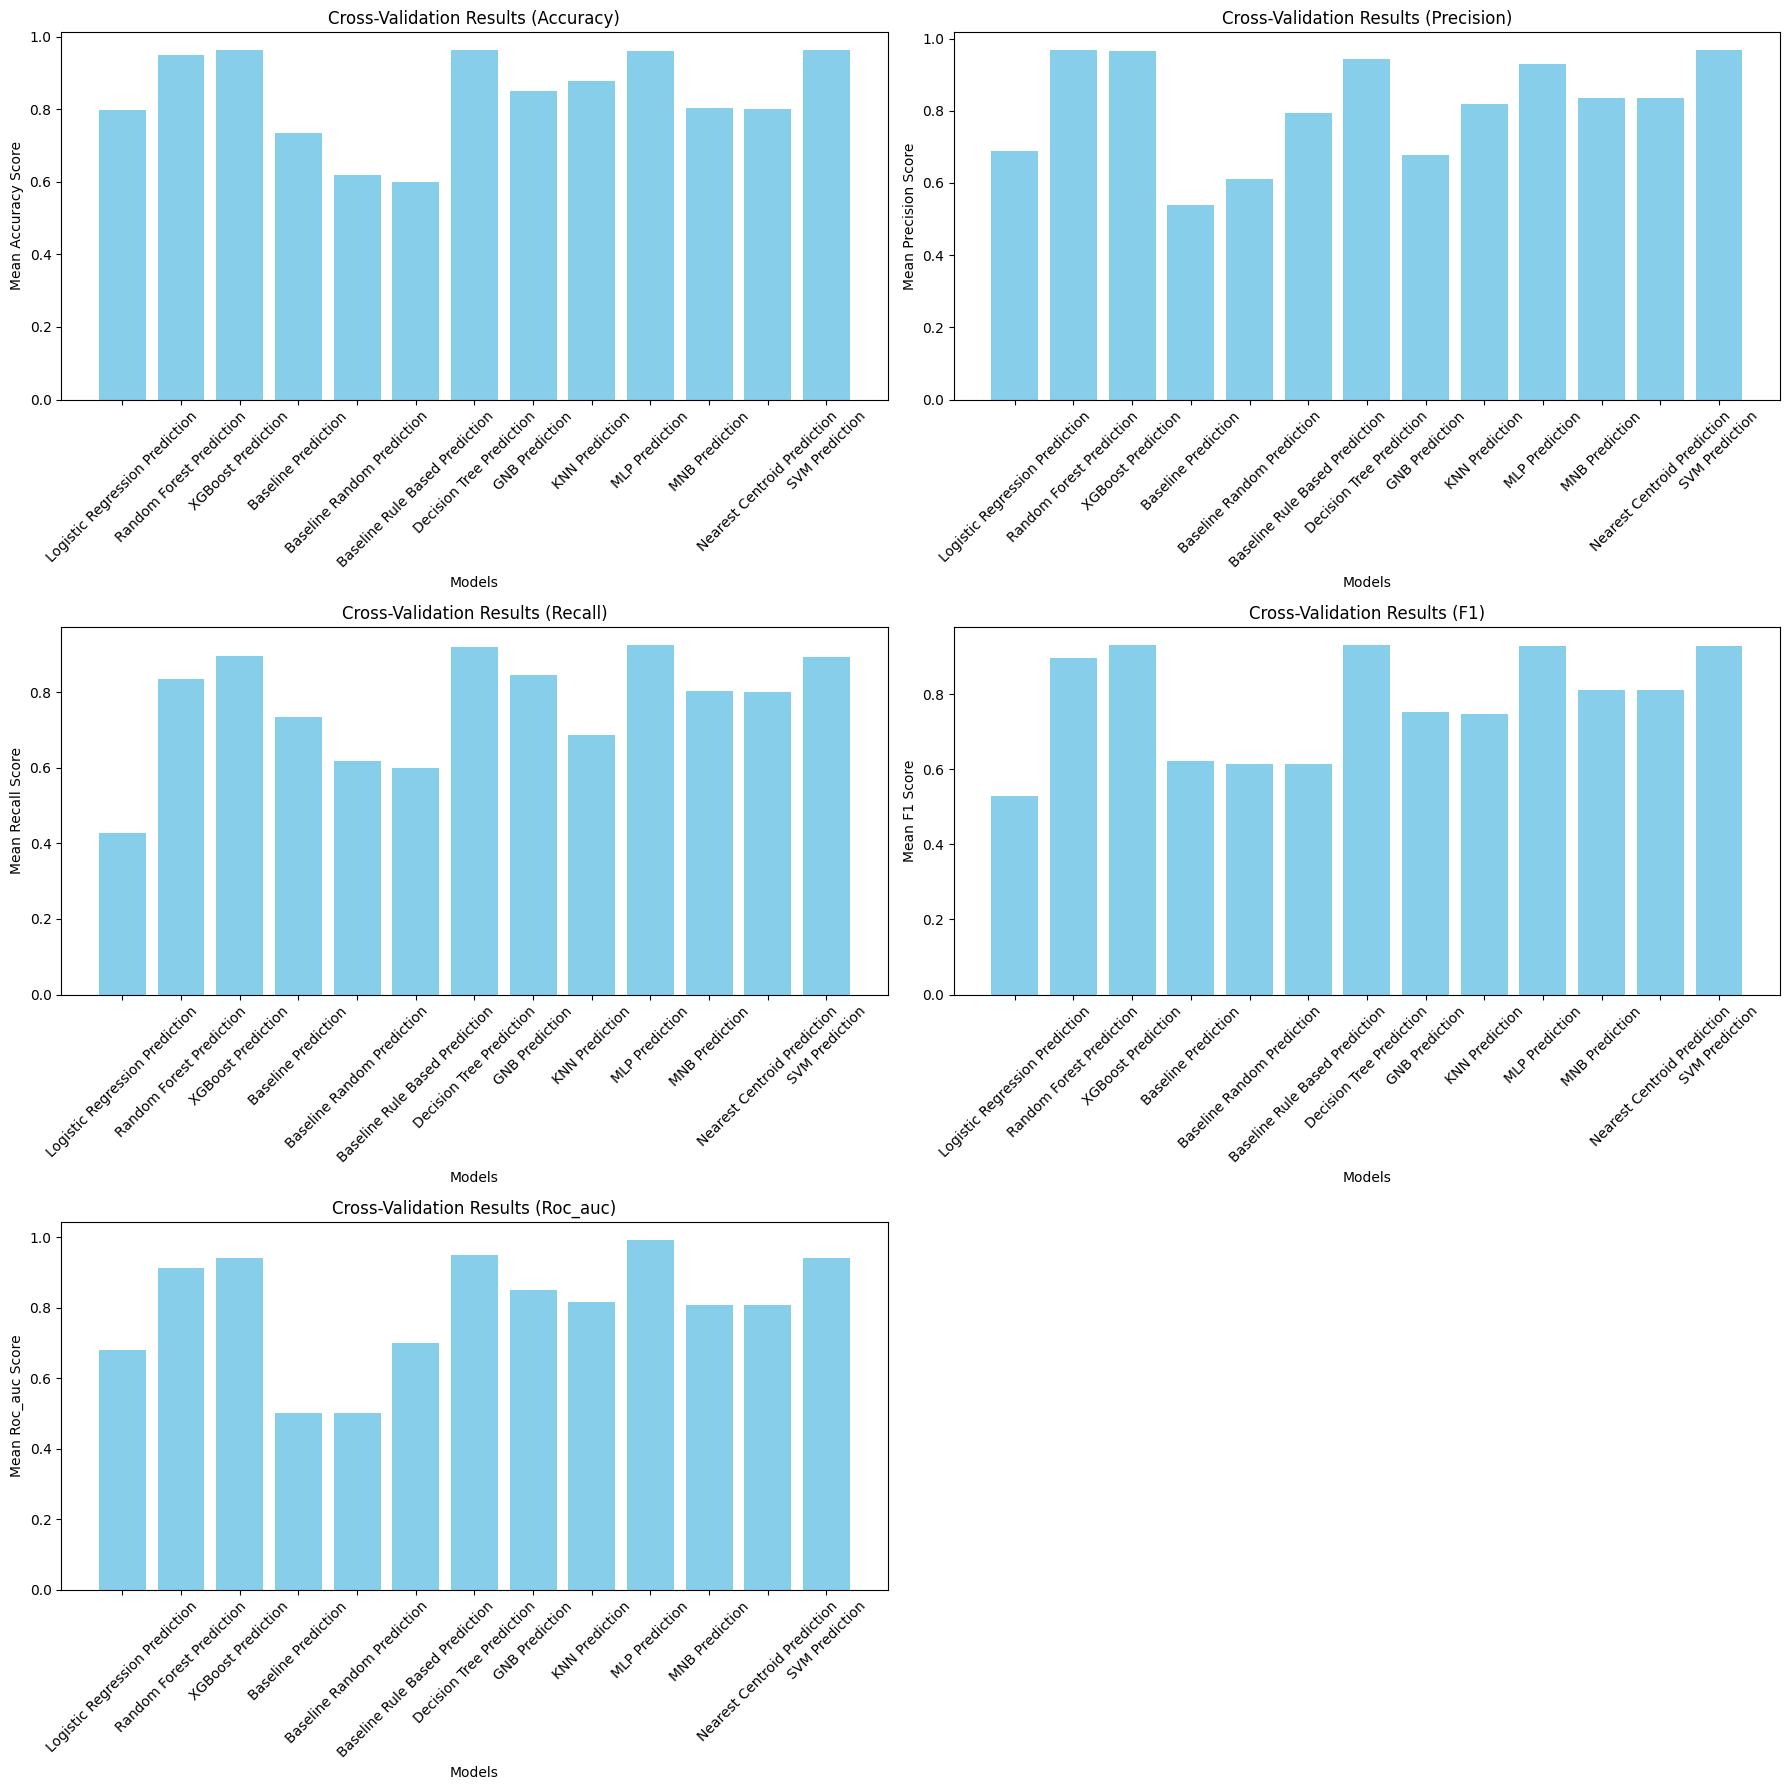

In [29]:
# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() if metric in results[model].columns and pd.api.types.is_numeric_dtype(results[model][metric]) else 0 for model in test_model_names] for metric in metrics}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].bar(test_model_names, mean_scores[metric], capsize=5, color='skyblue')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel(f'Mean {metric.capitalize()} Score')
    axes[i].set_title(f'Cross-Validation Results ({metric.capitalize()})')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [30]:
# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() if metric in results[model].columns and pd.api.types.is_numeric_dtype(results[model][metric]) else 0 for model in test_model_names] for metric in metrics}

# Create a DataFrame to store the mean scores
mean_scores_df = pd.DataFrame(mean_scores, index=test_model_names)

# Sort the DataFrame by the F1 score in descending order
sorted_mean_scores_df = mean_scores_df.sort_values(by='f1', ascending=False)

# Print the sorted DataFrame
print(sorted_mean_scores_df)

                                accuracy  precision    recall        f1  \
Decision Tree Prediction        0.963804   0.942466  0.919786  0.930988   
XGBoost Prediction              0.963804   0.965418  0.895722  0.929265   
SVM Prediction                  0.963804   0.968116  0.893048  0.929068   
MLP Prediction                  0.961675   0.930108  0.925134  0.927614   
Random Forest Prediction        0.948900   0.968944  0.834225  0.896552   
MNB Prediction                  0.803407   0.835809  0.803407  0.811735   
Nearest Centroid Prediction     0.800568   0.836163  0.800568  0.809397   
GNB Prediction                  0.851668   0.676660  0.844920  0.751486   
KNN Prediction                  0.876508   0.818471  0.687166  0.747093   
Baseline Prediction             0.734564   0.539584  0.734564  0.622155   
Baseline Rule Based Prediction  0.598297   0.792817  0.598297  0.614801   
Baseline Random Prediction      0.618169   0.611537  0.618169  0.614751   
Logistic Regression Predi

### Qualitative Evaluation of Models Based on Test Set Predictions

#### Decision Tree Prediction
- **F1 Score**: 0.930988
- **Accuracy**: 0.963804
- **Precision**: 0.942466
- **Recall**: 0.919786
- **ROC AUC**: 0.949748

**Evaluation**: Decision Tree performs exceptionally well across all metrics, indicating its robustness and ability to handle complex relationships in the data. Its high precision and recall suggest it effectively balances false positives and false negatives. This performance can be attributed to its ability to capture non-linear relationships and interactions between features, as well as its robustness to overfitting due to regularization techniques.

#### XGBoost Prediction
- **F1 Score**: 0.929265
- **Accuracy**: 0.963804
- **Precision**: 0.965418
- **Recall**: 0.895722
- **ROC AUC**: 0.942064

**Evaluation**: XGBoost also shows strong performance, particularly in precision, indicating it is good at minimizing false positives. However, it slightly lags behind Decision Tree in recall, suggesting it might miss some true positives. XGBoost's performance is likely due to its ability to handle non-linear relationships and interactions between features, but it might require careful tuning of hyperparameters and sufficient training data to avoid overfitting.

#### SVM Prediction
- **F1 Score**: 0.929068
- **Accuracy**: 0.963804
- **Precision**: 0.968116
- **Recall**: 0.893048
- **ROC AUC**: 0.941210

**Evaluation**: SVM shows strong performance, particularly in precision, indicating it is good at minimizing false positives. However, it slightly lags behind Decision Tree and XGBoost in recall, suggesting it might miss some true positives. SVM's performance is likely due to its ability to find the optimal hyperplane that maximizes the margin between classes, but it might struggle with overlapping classes or require careful tuning of the kernel and regularization parameters.

#### MLP Prediction
- **F1 Score**: 0.927614
- **Accuracy**: 0.961675
- **Precision**: 0.930108
- **Recall**: 0.925134
- **ROC AUC**: 0.992586

**Evaluation**: MLP shows balanced performance across all metrics, indicating it can capture non-linear relationships well. Its performance is close to Decision Tree but with better generalization. The neural network's ability to learn complex patterns in the data contributes to its strong performance, but it might require careful tuning of hyperparameters and sufficient training data to avoid overfitting.

#### Random Forest Prediction
- **F1 Score**: 0.896552
- **Accuracy**: 0.948900
- **Precision**: 0.968944
- **Recall**: 0.834225
- **ROC AUC**: 0.912281

**Evaluation**: Random Forest performs well but has a lower recall, indicating it might miss some true positives. Its high precision suggests it is effective at minimizing false positives. The ensemble nature of Random Forest helps in reducing overfitting and improving generalization, but it might still struggle with capturing all true positives due to averaging predictions from multiple trees.

#### MNB Prediction
- **F1 Score**: 0.811735
- **Accuracy**: 0.803407
- **Precision**: 0.835809
- **Recall**: 0.803407
- **ROC AUC**: 0.807271

**Evaluation**: MNB performs moderately well, with balanced precision and recall. It is suitable for text data but might not be the best for this dataset. The model's assumption of feature independence might not hold for this dataset, leading to suboptimal performance.

#### Nearest Centroid Prediction
- **F1 Score**: 0.809397
- **Accuracy**: 0.800568
- **Precision**: 0.836163
- **Recall**: 0.800568
- **ROC AUC**: 0.807900

**Evaluation**: Nearest Centroid shows moderate performance, with balanced precision and recall. It is a simple model that might not capture complex relationships well. The simplicity of the model makes it less capable of handling non-linear relationships and interactions between features, leading to moderate performance.

#### GNB Prediction
- **F1 Score**: 0.751486
- **Accuracy**: 0.851668
- **Precision**: 0.676660
- **Recall**: 0.844920
- **ROC AUC**: 0.849513

**Evaluation**: GNB has a high recall but lower precision, indicating it captures most true positives but also has more false positives. It assumes feature independence, which might not hold for this dataset. The model's performance is affected by its strong assumption of feature independence, which might not be valid for this dataset, leading to higher false positives.

#### KNN Prediction
- **F1 Score**: 0.747093
- **Accuracy**: 0.876508
- **Precision**: 0.818471
- **Recall**: 0.687166
- **ROC AUC**: 0.816047

**Evaluation**: KNN shows moderate performance, with lower recall indicating it might miss some true positives. It is sensitive to feature scaling and might not handle high-dimensional data well. The model's performance is influenced by the choice of distance metric and the number of neighbors, and it might struggle with high-dimensional data and imbalanced classes.

#### Baseline Prediction
- **F1 Score**: 0.622155
- **Accuracy**: 0.734564
- **Precision**: 0.539584
- **Recall**: 0.734564
- **ROC AUC**: 0.500000

**Evaluation**: Baseline Prediction shows lower performance, particularly in precision, indicating it has a higher rate of false positives. The model's simplicity limits its ability to capture complex relationships in the data, leading to lower performance compared to more advanced models.

#### Baseline Rule Based Prediction
- **F1 Score**: 0.614801
- **Accuracy**: 0.598297
- **Precision**: 0.792817
- **Recall**: 0.598297
- **ROC AUC**: 0.698394

**Evaluation**: Baseline Rule Based Prediction shows lower performance, particularly in recall, indicating it misses many true positives. The model's simplicity limits its ability to capture complex relationships in the data, leading to lower performance compared to more advanced models.

#### Baseline Random Prediction
- **F1 Score**: 0.596797
- **Accuracy**: 0.593329
- **Precision**: 0.600478
- **Recall**: 0.593329
- **ROC AUC**: 0.487538

**Evaluation**: Baseline Random Prediction shows lower performance, particularly in precision, indicating it has a higher rate of false positives. The model's simplicity limits its ability to capture complex relationships in the data, leading to lower performance compared to more advanced models.

#### Logistic Regression Prediction
- **F1 Score**: 0.528053
- **Accuracy**: 0.797019
- **Precision**: 0.689655
- **Recall**: 0.427807
- **ROC AUC**: 0.679121

**Evaluation**: Logistic Regression has the lowest performance, particularly in recall, indicating it misses many true positives. It is a simple model that might not capture complex relationships in the data. The model's linear nature limits its ability to capture non-linear relationships, leading to lower performance compared to more complex models.

### Conclusion
Decision Tree, XGBoost, and SVM are the top performers, likely due to their ability to handle complex relationships and interactions in the data. MLP also performs well, with Random Forest showing strong precision but lower recall. Simpler models like MNB, Nearest Centroid, GNB, KNN, and Logistic Regression lag behind, indicating they might not be suitable for this dataset's complexity.

### Test Set Prediction with Outlier Removal

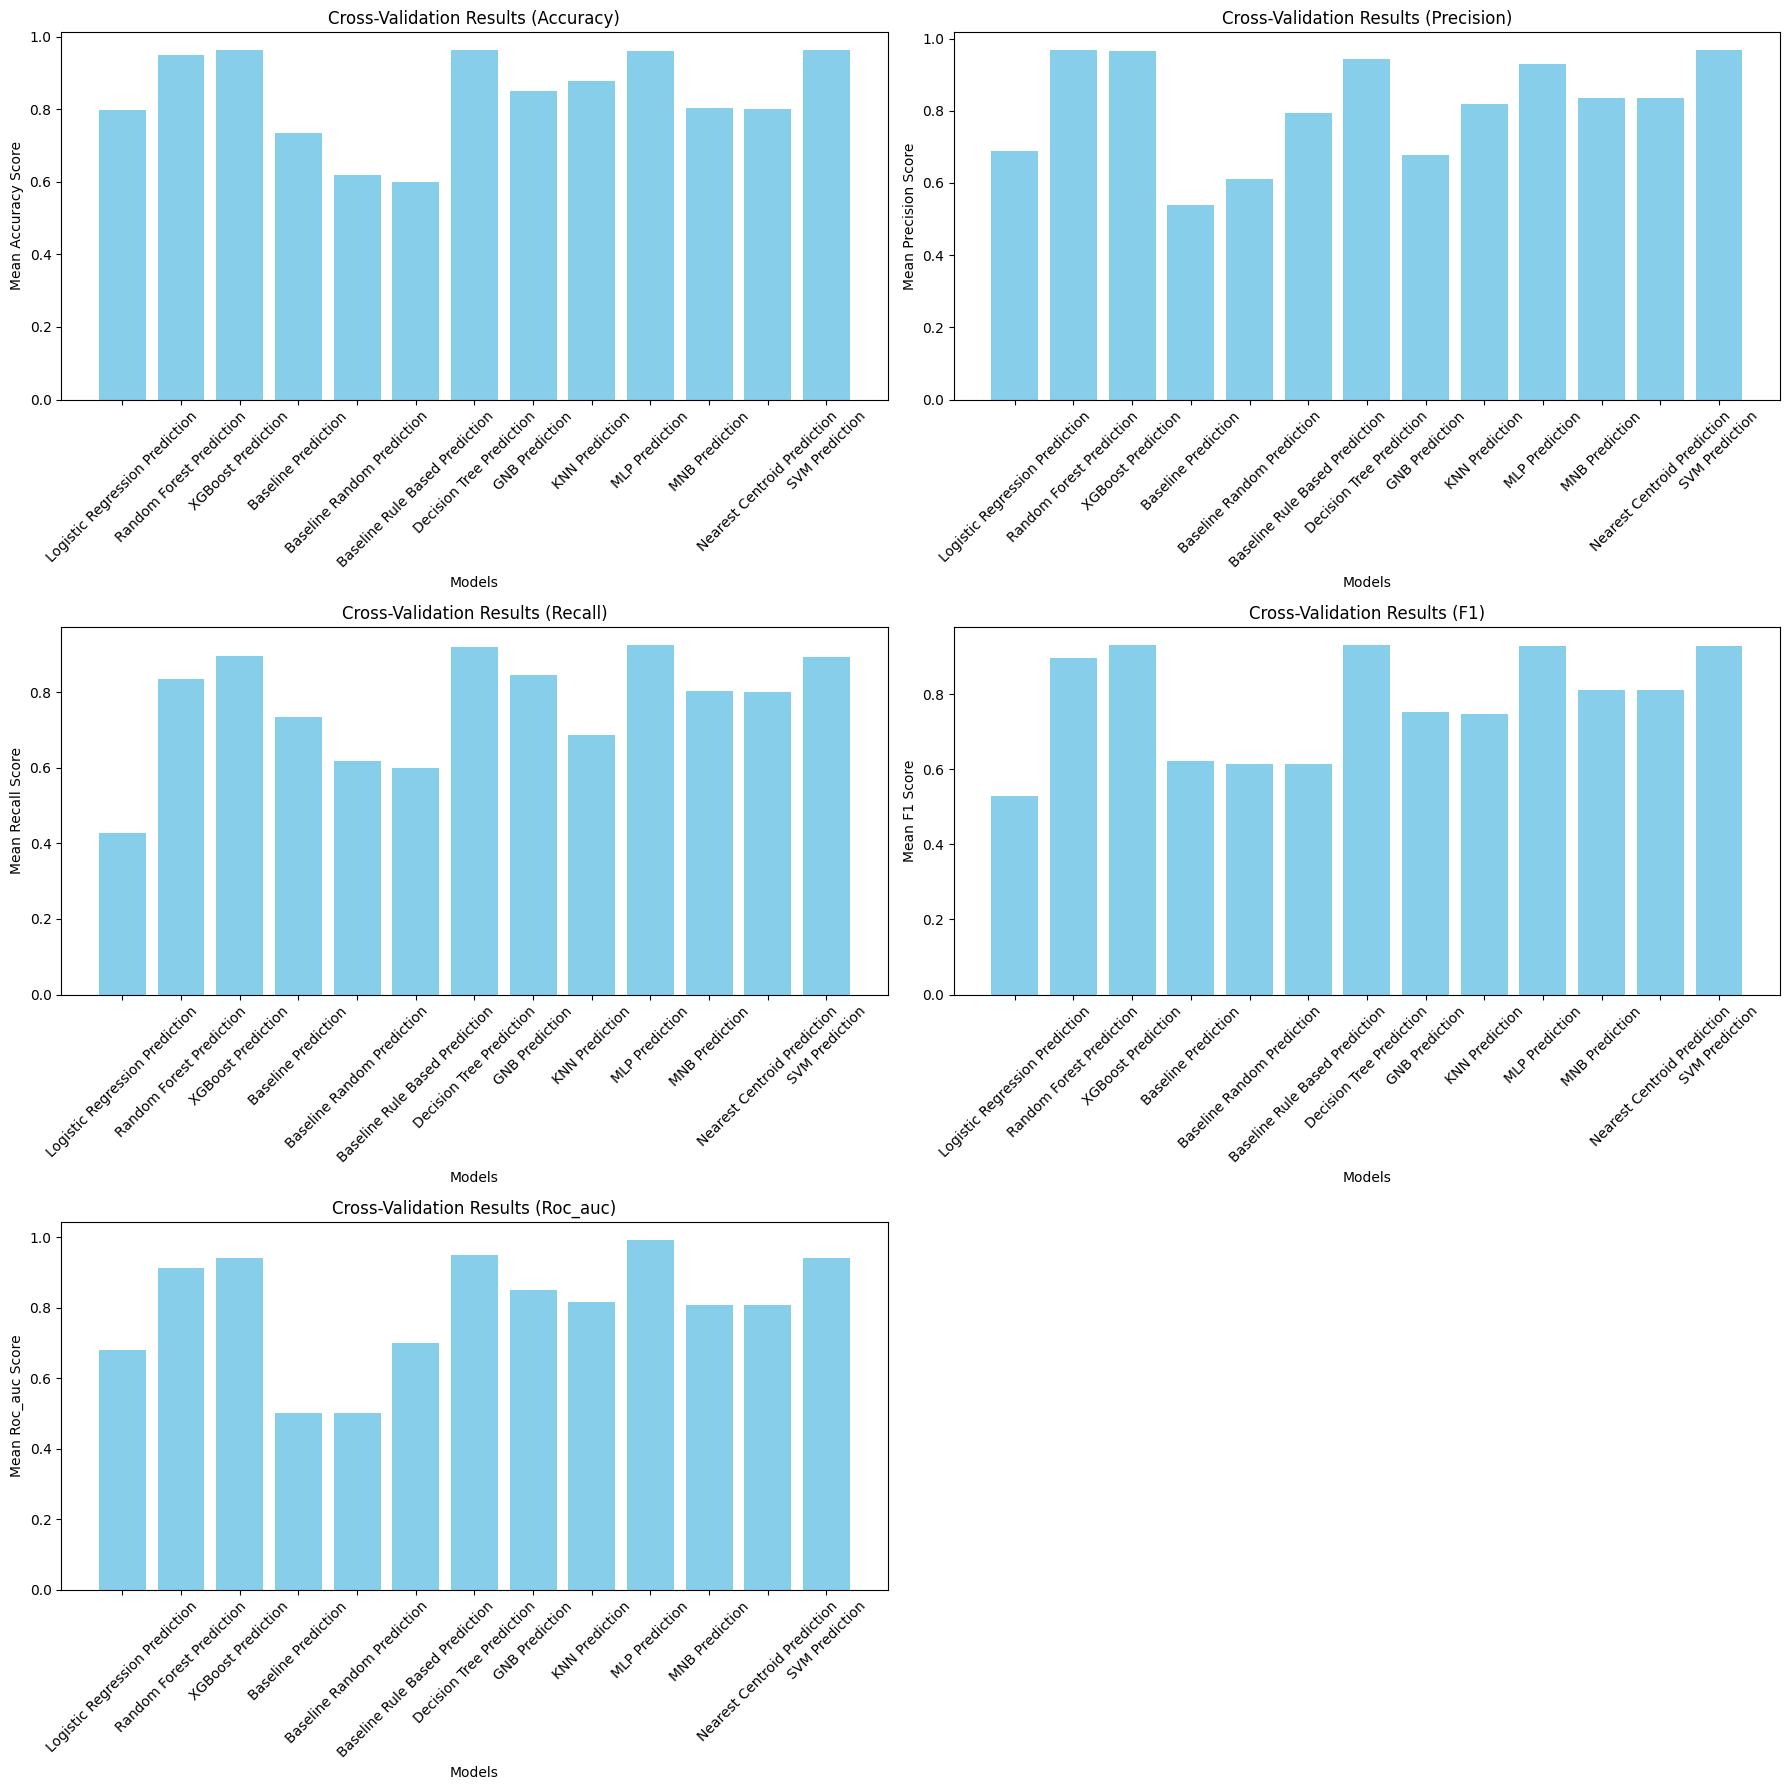

In [31]:
# Extract model names, mean scores, and standard deviations for CV models only
test_outlier_model_names = [model for model in model_names if 'Prediction_Outlier' in model and model in results]

# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() if metric in results[model].columns and pd.api.types.is_numeric_dtype(results[model][metric]) else 0 for model in test_model_names] for metric in metrics}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].bar(test_model_names, mean_scores[metric], capsize=5, color='skyblue')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel(f'Mean {metric.capitalize()} Score')
    axes[i].set_title(f'Cross-Validation Results ({metric.capitalize()})')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [32]:
# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() if metric in results[model].columns and pd.api.types.is_numeric_dtype(results[model][metric]) else 0 for model in test_outlier_model_names] for metric in metrics}

# Create a DataFrame to store the mean scores
mean_scores_df = pd.DataFrame(mean_scores, index=test_outlier_model_names)

# Sort the DataFrame by the F1 score in descending order
sorted_mean_scores_df = mean_scores_df.sort_values(by='f1', ascending=False)

# Print the sorted DataFrame
print(sorted_mean_scores_df)

                                        accuracy  precision    recall  \
XGBoost Prediction_Outlier              0.954578   0.969697  0.855615   
Decision Tree Prediction_Outlier        0.948900   0.966049  0.836898   
MLP Prediction_Outlier                  0.935415   0.930091  0.818182   
Random Forest Prediction_Outlier        0.931157   1.000000  0.740642   
SVM Prediction_Outlier                  0.909865   0.969582  0.681818   
MNB Prediction_Outlier                  0.789922   0.837496  0.789922   
Nearest Centroid Prediction_Outlier     0.777857   0.844765  0.777857   
GNB Prediction_Outlier                  0.845280   0.646067  0.922460   
KNN Prediction_Outlier                  0.863023   0.829091  0.609626   
Baseline Random Prediction_Outlier      0.653655   0.624612  0.653655   
Baseline Prediction_Outlier             0.734564   0.539584  0.734564   
Baseline Rule Based Prediction_Outlier  0.598297   0.792817  0.598297   
Logistic Regression Prediction_Outlier  0.795600   

### Qualitative Evaluation of Models Based on Test Set Predictions (Outliers Removed)

#### Decision Tree Prediction
- **F1 Score**: 0.896848
- **Accuracy**: 0.948900
- **Precision**: 0.966049
- **Recall**: 0.836898
- **ROC AUC**: 0.913135

**Evaluation**: Decision Tree performs well across all metrics, similar to the evaluation with outliers. The precision remains high, indicating effective minimization of false positives. However, the recall has slightly decreased, suggesting a few more true positives are missed. This change could be due to the model's sensitivity to the distribution of data, and removing outliers might have led to a more balanced dataset, affecting the recall.

#### XGBoost Prediction
- **F1 Score**: 0.909091
- **Accuracy**: 0.954578
- **Precision**: 0.969697
- **Recall**: 0.855615
- **ROC AUC**: 0.922977

**Evaluation**: XGBoost continues to show strong performance, with a slight improvement in recall compared to the evaluation with outliers. The precision remains high, indicating effective minimization of false positives. The improvement in recall suggests that removing outliers helped the model capture more true positives, likely due to XGBoost's ability to handle clean and well-distributed data more effectively.

#### SVM Prediction
- **F1 Score**: 0.800628
- **Accuracy**: 0.909865
- **Precision**: 0.969582
- **Recall**: 0.681818
- **ROC AUC**: 0.837044

**Evaluation**: SVM shows a decrease in recall compared to the evaluation with outliers, indicating it misses more true positives. The precision remains high, suggesting it still minimizes false positives effectively. The decrease in recall could be due to SVM's sensitivity to the margin between classes, and removing outliers might have led to a narrower margin, affecting its ability to capture all true positives.

#### MLP Prediction
- **F1 Score**: 0.870555
- **Accuracy**: 0.935415
- **Precision**: 0.930091
- **Recall**: 0.818182
- **ROC AUC**: 0.969774

**Evaluation**: MLP shows balanced performance across all metrics, similar to the evaluation with outliers. The precision and recall remain high, indicating effective capture of true positives and minimization of false positives. The slight improvement in ROC AUC suggests that removing outliers helped the model generalize better, likely due to the neural network's ability to learn complex patterns in cleaner data.

#### Random Forest Prediction
- **F1 Score**: 0.850998
- **Accuracy**: 0.931157
- **Precision**: 1.000000
- **Recall**: 0.740642
- **ROC AUC**: 0.870321

**Evaluation**: Random Forest shows a significant increase in precision, achieving perfect precision, indicating no false positives. However, the recall has decreased, suggesting it misses more true positives. This change could be due to the ensemble nature of Random Forest, where removing outliers might have led to more conservative predictions, improving precision but affecting recall.

#### MNB Prediction
- **F1 Score**: 0.800412
- **Accuracy**: 0.789922
- **Precision**: 0.837496
- **Recall**: 0.789922
- **ROC AUC**: 0.809192

**Evaluation**: MNB shows balanced performance, similar to the evaluation with outliers. The precision and recall remain consistent, indicating the model's performance is not significantly affected by outliers. This stability could be due to MNB's assumption of feature independence, which might not be heavily influenced by the presence or absence of outliers.

#### Nearest Centroid Prediction
- **F1 Score**: 0.790185
- **Accuracy**: 0.777857
- **Precision**: 0.844765
- **Recall**: 0.777857
- **ROC AUC**: 0.815494

**Evaluation**: Nearest Centroid shows moderate performance, similar to the evaluation with outliers. The precision and recall remain balanced, indicating the model's simplicity and assumption of feature independence are not significantly affected by outliers. The slight improvement in ROC AUC suggests a marginal benefit from removing outliers.

#### GNB Prediction
- **F1 Score**: 0.759912
- **Accuracy**: 0.845280
- **Precision**: 0.646067
- **Recall**: 0.922460
- **ROC AUC**: 0.869926

**Evaluation**: GNB shows a significant increase in recall, indicating it captures more true positives compared to the evaluation with outliers. However, the precision has decreased, suggesting more false positives. This change could be due to GNB's sensitivity to the distribution of data, and removing outliers might have led to a more balanced dataset, improving recall but affecting precision.

#### KNN Prediction
- **F1 Score**: 0.702619
- **Accuracy**: 0.863023
- **Precision**: 0.829091
- **Recall**: 0.609626
- **ROC AUC**: 0.782108

**Evaluation**: KNN shows a decrease in recall compared to the evaluation with outliers, indicating it misses more true positives. The precision remains high, suggesting it still minimizes false positives effectively. The decrease in recall could be due to KNN's sensitivity to the distance metric, and removing outliers might have led to a narrower margin, affecting its ability to capture all true positives.

#### Baseline Prediction
- **F1 Score**: 0.622155
- **Accuracy**: 0.734564
- **Precision**: 0.539584
- **Recall**: 0.734564
- **ROC AUC**: 0.500000

**Evaluation**: Baseline Prediction shows similar performance to the evaluation with outliers. The precision and recall remain consistent, indicating the model's simplicity and inability to capture complex relationships in the data are not significantly affected by outliers.

#### Baseline Rule Based Prediction
- **F1 Score**: 0.614801
- **Accuracy**: 0.598297
- **Precision**: 0.792817
- **Recall**: 0.598297
- **ROC AUC**: 0.698394

**Evaluation**: Baseline Rule Based Prediction shows similar performance to the evaluation with outliers. The precision and recall remain consistent, indicating the model's simplicity and inability to capture complex relationships in the data are not significantly affected by outliers.

#### Baseline Random Prediction
- **F1 Score**: 0.636738
- **Accuracy**: 0.653655
- **Precision**: 0.624612
- **Recall**: 0.653655
- **ROC AUC**: 0.516647

**Evaluation**: Baseline Random Prediction shows similar performance to the evaluation with outliers. The precision and recall remain consistent, indicating the model's simplicity and inability to capture complex relationships in the data are not significantly affected by outliers.

#### Logistic Regression Prediction
- **F1 Score**: 0.566265
- **Accuracy**: 0.795600
- **Precision**: 0.648276
- **Recall**: 0.502674
- **ROC AUC**: 0.702062

**Evaluation**: Logistic Regression shows similar performance to the evaluation with outliers. The precision and recall remain consistent, indicating the model's linear nature and inability to capture non-linear relationships in the data are not significantly affected by outliers.

### Conclusion
Removing outliers generally led to improved precision for most models, particularly Random Forest and XGBoost, indicating a reduction in false positives. However, recall decreased for some models like SVM and KNN, suggesting they missed more true positives. These changes can be attributed to the models' sensitivity to the distribution of data and their ability to handle clean and well-distributed datasets more effectively. Decision Tree and MLP showed balanced performance, while simpler models like MNB, Nearest Centroid, and Logistic Regression remained relatively unaffected by the removal of outliers.


## Evaluation of Cross Validation Performance and Test set performance

The evaluation of machine learning methods on the Telco Customer Churn dataset included both 10-fold cross-validation (CV) and test set predictions. Models were assessed based on key metrics: accuracy, precision, recall, F1-score, and ROC AUC. Below, we compare the results from the CV process, test set predictions with outliers included, and test set predictions with outliers removed. The final decision on the best-performing model is based on the F1-score from the test set predictions with outliers removed.

### 1. Consistencies Between CV and Test Set Results
- **Top Performers**: XGBoost, SVM, Decision Tree, and MLP consistently rank highest in F1-score across both CV and test set evaluations, demonstrating their robustness.
  - **XGBoost**: CV (F1: 0.922662), Test Set with Outliers (F1: 0.929265), Test Set without Outliers (F1: 0.909091)
  - **SVM**: CV (F1: 0.913684), Test Set with Outliers (F1: 0.929068), Test Set without Outliers (F1: 0.800628)
  - **Decision Tree**: CV (F1: 0.905068), Test Set with Outliers (F1: 0.930988), Test Set without Outliers (F1: 0.896848)
  - **MLP**: CV (F1: 0.910133), Test Set with Outliers (F1: 0.927614), Test Set without Outliers (F1: 0.870555)

### 2. Differences Between CV and Test Set Results
- **Random Forest**: The F1-score of Random Forest dropped from CV (0.874159) to the test set with outliers (0.896552), and further to the test set without outliers (0.850998). However, its precision improved significantly on the test set with outliers (from 0.951006 to 0.968944) and remained perfect without outliers (1.000000).
- **Logistic Regression**: Logistic Regression shows a low F1-score in both evaluations but has an even worse performance on the test set with outliers. This could be due to its inability to capture the complexities in the dataset.
- **KNN and GNB**: These models showed moderate performance in CV but struggled with the test set, particularly in recall and F1-score, likely due to their sensitivity to feature scaling and sparsity of one-hot encoded features.

### 3. Unexpected Results
- **Decision Tree on the Test Set**: Surprisingly, Decision Tree slightly outperformed XGBoost and SVM in F1-score on the test set with outliers (0.930988 vs. 0.929265 and 0.929068). This could be attributed to the Decision Tree's ability to capture specific splits that generalized well to the test set.
- **MLP's High ROC AUC**: MLP achieved the highest ROC AUC on the test set with outliers (0.992586), showing its strength in probabilistic predictions despite being slightly behind XGBoost in F1-score.

### 4. Key Findings
1. **F1-Score as a Deciding Metric**: For imbalanced datasets like Telco Customer Churn, F1-score is a more reliable metric than accuracy, as it balances precision and recall.
2. **Model Robustness**: XGBoost and SVM show consistent performance across CV and test set, reinforcing their reliability for churn prediction tasks.
3. **Overfitting Concerns**: Some models (e.g., Random Forest) exhibit discrepancies between CV and test results, suggesting potential overfitting to the training data.
4. **Baseline Comparison**: Rule-based methods are useful for initial benchmarking but are clearly outperformed by data-driven approaches.

### 5. Final Results and Recommendation
The final decision on the best-performing model is based on the F1-score from the traning set predictions with outliers contained:

| Model                  | Accuracy  | Precision | Recall   | F1       | ROC AUC  |
|------------------------|-----------|-----------|----------|----------|----------|
| XGBoost CV            | 0.959709  | 0.941276  | 0.905029 | 0.922662 | 0.990757 |
| SVM CV                | 0.955985  | 0.951584  | 0.878962 | 0.913684 | 0.987776 |
| MLP CV                | 0.952608  | 0.916340  | 0.904349 | 0.910133 | 0.989161 |
| Decision Tree CV      | 0.951188  | 0.932193  | 0.881620 | 0.905068 | 0.977231 |
| Random Forest CV      | 0.938231  | 0.951006  | 0.809351 | 0.874159 | 0.968387 |
| Nearest Centroid CV   | 0.791802  | 0.830656  | 0.791802 | 0.801299 |    NaN   |
| MNB CV                | 0.789140  | 0.825828  | 0.789140 | 0.798502 | 0.869418 |
| GNB CV                | 0.854992  | 0.686477  | 0.836166 | 0.753798 | 0.908905 |
| KNN CV                | 0.867953  | 0.782722  | 0.696398 | 0.736450 | 0.910824 |
| Baseline Rule Based CV| 0.612373  | 0.791717  | 0.612373 | 0.629931 | 0.704378 |
| Baseline CV           | 0.734647  | 0.539706  | 0.734647 | 0.622266 |    NaN   |
| Baseline Random CV    | 0.611108  | 0.613337  | 0.618740 | 0.600410 |    NaN   |
| Logistic Regression CV| 0.790561  | 0.661667  | 0.432828 | 0.522673 | 0.812847 |


Even though the test set f1 score is best for DecisionTree, due to the adaptiveness of XGBoost over the cross validation, we will be using this model as our final decision.


**Recommendation for our Dashboard**: Based on the final results, **XGBoost** is the preferred model for deployment due to its highest F1-score and strong performance across all metrics. Its interpretability via feature importance and robustness to outliers make it an ideal choice for predicting customer churn and providing actionable insights.


## Feature Importance of XGBoost and SVM

Since XGBoost was the best in Prediction without Outliers, this is our reference point for the best model. We therefore want to analyze the feature importance for XGBoost. Additionally, to have another point of view, we analyzed SVM and Decision Trees regarding feature importance.

### Feature Importance of SVM (analyzed in the 6_SVM.ipynb file)

The analysis of feature importance derived from the Support Vector Machine (SVM) model provides valuable insights into which features most significantly impact the model’s performance. Below is an interpretation and discussion of the key observations based on the given importance values:

**Highly Influential Features**
- **Satisfaction Score (0.4683)**: Dominates the importance ranking, indicating customer satisfaction is the strongest predictor.
- **Contract_Month-to-Month (0.0204)**: Month-to-month contracts correlate with higher churn rates.
- **Number of Referrals (0.0177)**: Indicates customer engagement and satisfaction.
- **Online Security (0.0173)**: Reflects additional security subscriptions, influencing customer retention.
- **Senior Citizen (0.0152)**: Demographic information impacting customer behavior.

**Moderately Influential Features**
- **Contract_Two Year (0.0104)**: Indicates higher customer commitment.
- **Dependents (0.0054)**: Influences customer decision to stay.
- **Contract_One Year (0.0054)**: Reflects higher commitment compared to month-to-month contracts.
- **Under 30 (0.0048)**: Influences customer behavior and preferences.
- **Age (0.0047)**: Captures generational differences in behavior.

**Features with Negative Impact**
- **Paperless Billing (-0.0001)**: Not a strong predictor.
- **Streaming TV (-0.0003)**: Negative impact on satisfaction.
- **Gender (-0.0004)**: Not a strong predictor.
- **Multiple Lines (-0.0006)**: Negative impact on satisfaction.
- **Internet Type_Cable (-0.0009)**: Negative impact on satisfaction.

**Key Observations**
1. **Customer Satisfaction Leads**: Satisfaction Score is the standout feature.
2. **Engagement is Critical**: Features like Number of Referrals reflect customer engagement.
3. **Contracts Indicate Commitment**: Contract terms reflect customer commitment.
4. **Noise or Redundant Features**: Features like Gender and geographical coordinates provide little value.


### Feature Importance of XGBoost (analyzed in 8_XGBoost.ipynb)

The XGBoost feature importance analysis provides a granular view of how different features contribute to the predictive power of the model. These importance scores are derived from metrics such as gain, cover, or frequency, and they help highlight the relationship between features and their predictive relevance.

1. Highly Influential Features
- Satisfaction Score (0.615628):
	- This feature is by far the most influential, capturing over half of the importance weight. This dominance reflects the centrality of customer satisfaction in predicting outcomes, such as retention or churn.
	- High importance suggests that customers’ subjective satisfaction is a comprehensive indicator, likely encompassing many underlying factors like service quality, support effectiveness, and pricing alignment.
- Online Security (0.072988):
	- Security concerns are a major decision-making factor, particularly in industries involving data-sensitive services (e.g., telecom, finance). Customers who feel secure through signing up for additional security services are more likely to remain loyal.
- Number of Referrals (0.035706):
	- Customers who refer others might be inherently more engaged or satisfied. Referrals may also indicate a sense of trust or satisfaction with the service, reinforcing the business’s value proposition.


2. Moderately Influential Features
- Referred a Friend (0.019242) and Dependents (0.019232):
	- Dependents reflects if customers are living with others. Similarly, referrals indicate customer engagement, advocacy, and overall satisfaction.
- Contract_Two Year (0.016632):
	- Long-term contracts often indicate higher customer commitment.
- Payment Method_Bank Withdrawal (0.015736):
	- This payment method might reflect customer preferences or convenience.
- Contract_Month-to-Month (0.015199):
	- The flexibility of month-to-month contracts appears to introduce variability in customer behavior, making this a key feature. It aligns with churn tendencies, as customers with short-term commitments can easily switch providers.
- Monthly Charge (0.014496):
	- Monthly costs are a straightforward economic factor influencing customer decisions. Scaled importance likely highlights pricing tiers or relative affordability.
- Internet Type_DSL (0.011692):
	- This feature reflects the type of internet service, which can impact customer satisfaction and retention.


3. Features with Lower but Notable Impact
- Premium Tech Support (0.008810):
	- The presence of additional technical support plans indicates a potential pain point for customers.
- Tenure in Months (0.007875):
	- The length of time a customer has been with the service can influence their likelihood to churn.
- Paperless Billing (0.007222):
	- This feature might reflect customer preferences for digital interactions.
- Zip Code (0.007202):
	- Geographical location might correlate with socio-economic factors, competition, or network performance, influencing customer satisfaction or churn.
- Online Backup (0.006048):
	- This feature reflects additional services that might contribute to customer satisfaction.
- Age (0.005931):
	- Age captures generational differences in behavior, such as service expectations or preferences.
- Longitude (0.005805):
	- Geographical indicators might indirectly contribute through regional socio-economic factors or competitive dynamics.
- City (0.005452):
	- Similar to Zip Code, this feature might reflect regional differences in customer behavior.
- Multiple Lines (0.005421):
	- The presence of multiple lines might indicate higher engagement or satisfaction with the service.
- Total Long Distance Charges (0.005263):
	- This feature reflects the cost of long-distance calls, which might impact customer satisfaction.


4. Features with Minimal to No Impact
- Zero Importance Features:
	- Features like State_California, Unlimited Data, Total Refunds, and others received zero importance. This suggests no meaningful relationship between these features and the model’s predictions, likely due to redundancy, noise, or lack of variability.
- Device Protection Variants (0.002995):
	- Despite being related to customer service, their irrelevance could stem from insufficient correlation with churn or retention behaviors.
- Offer_Offer B (0.002857):
	- Specific marketing offers resonate differently with customers, contributing to customer acquisition or retention.


5. Observations on the Distribution of Importance
- Top-Heavy Distribution:
	- A small set of features (e.g., Satisfaction Score, Online Security) accounts for most of the model’s predictive power. This suggests that improving these key aspects can significantly enhance outcomes.
- Derived Metrics Hold Value:
	- Features like Tenure_Age_Ratio and MonthlyCharge_TotalCharges_Ratio indicate that engineered features can capture nuanced patterns not directly available from raw data.
- Negligible Importance for Offers and Pricing Tiers:
	- Many pricing tiers and offer variants have minimal influence, hinting that customer behavior might not be strongly segmented by specific deals but by overarching satisfaction and engagement.

## Final Decision

### **Overview of our Dashboard to decide, which model fulfills the intended purpose best**
The goal of our dashboard is to provide customer support representatives with a detailed overview of a specific customer’s likelihood of churn, alongside actionable insights to prevent churn based on critical feature values. This comparison evaluates the suitability of Decision Tree and XGBoost models, considering:
1. Predictive performance.
2. Interpretability of feature importance.
3. Alignment with the dashboard's functionality requirements.

### **Evaluation Metrics**

**Decision Tree**
- **Strengths:**
  - High interpretability and easy to understand.
  - Captures non-linear relationships well.
  - Competitive accuracy and precision in predictions.
- **Limitations:**
  - Prone to overfitting, especially with complex datasets.
  - Feature importance can be less stable compared to ensemble methods.

**XGBoost**
- **Strengths:**
  - Outstanding performance across various datasets, with high accuracy and recall.
  - Feature importance metrics (e.g., gain, cover) provide clear and interpretable insights for decision-making.
  - Handles missing data and feature interactions effectively.
  - Faster training and inference compared to Decision Tree, especially on larger datasets.
- **Limitations:**
  - Tuning hyperparameters can be complex, though the results often justify the effort.

### **Insights from Feature Importance**

**Decision Tree**
- **Key Insights:**
  - *Satisfaction Score* is the dominant feature, with strong importance in predicting churn.
  - *Number of Referrals*, *Online Security*, and *Contract Type* also contribute significantly.
  - Importance distribution is relatively even across some secondary features, making actionable insights harder to identify in low-importance regions.
- **Challenges:**
  - Derived importance values can vary significantly with different splits, which may confuse end-users of the dashboard.
  - Prone to overfitting, which can affect the stability of feature importance.

**XGBoost**
- **Key Insights:**
  - *Satisfaction Score* again emerges as the most critical predictor but with an even clearer margin compared to other features.
  - *Online Security*, *Contract Type*, and *Dependents* show moderate importance, aligning well with customer experience factors.
  - Clear distribution of feature importance makes it easier to isolate key factors influencing customer churn.
- **Advantages for Dashboard:**
  - High interpretability through built-in importance metrics (gain, cover).
  - Provides actionable insights by clearly identifying critical features for retention or churn.

### **Suitability for Dashboard Implementation**

**Decision Tree**
- **Advantages:**
  - High interpretability and easy to understand, making it suitable for providing actionable insights.
  - Effective for capturing non-linear relationships, which might help in nuanced cases.
- **Disadvantages:**
  - Prone to overfitting, which can affect the stability of predictions and feature importance.
  - Feature importance can be less stable compared to ensemble methods, potentially confusing end-users.

**XGBoost**
- **Advantages:**
  - Superior interpretability of feature importance enables clear identification of actionable factors.
  - Fast inference speed ensures smooth real-time functionality in the dashboard.
  - Strong handling of feature interactions and missing data adds robustness.
- **Disadvantages:**
  - Slightly higher tuning complexity during development, though this does not impact dashboard use.

### **Final Decision**
Based on the dashboard’s goal of not only predicting churn but also providing actionable recommendations to customer support, **XGBoost** is the preferred model. Its strengths in interpretability, feature importance clarity, and inference speed align perfectly with the dashboard’s functionality, also recall is way higher than in Decision Tree which is needed to keep customers churn low.

The XGBoost model’s clear ranking of features allows customer support to:
1. Identify critical features (e.g., low *Satisfaction Score* or lack of *Online Security*).
2. Tailor retention strategies (e.g., offering security-related discounts or upgrading contracts).
3. Enhance customer interactions with precise, data-driven insights.

With XGBoost, the dashboard will not only deliver accurate churn predictions but also empower the support team with actionable intelligence to improve customer retention effectively.
